In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:,}'.format
sn.set_style('whitegrid')
%matplotlib inline

In [37]:
from scipy.optimize import least_squares
from scipy.stats import expon
from scipy.stats import weibull_min as weibull
from scipy.optimize import fsolve

# cdf(x, c, loc=0, scale=1)

def expo_cdf(x, max_dur=95, start=1):
    return 1- 1/np.exp(x*np.arange(start,max_dur))

def ssr_cdf(x,other_cdf,start):
    return other_cdf-expo_cdf(x,max_dur=other_cdf.size+start,start=start)

# adj_exp = least_squares(ssr_cdf,0.12,args=(cdf_T_ger['fraction'],1))

In [113]:
fast_lbda = 1 / 0.3
med_lbda = 1 / 0.1
slow_lbda = 1/0.0374226
k = 0.6
N = 10000

sample_fast = expon.rvs(scale=fast_lbda, size=(5000,2))
sample_slow = expon.rvs(scale=slow_lbda, size=(5000,2))
np.average(np.vstack((sample_fast,sample_slow)))

sample_ht = np.vstack((sample_fast,sample_slow))
sample_dd = weibull.rvs(c=k,scale=med_lbda, size=(N,2))

implied_lambda = np.average(sample_dd)
sample_constant = expon.rvs(scale=implied_lambda, size=(N,2))

In [114]:
np.average(sample_constant)

15.10863960075957

In [115]:
np.average(sample_dd)

15.091627626316413

In [116]:
np.average(sample_ht)

15.159648292591339

In [76]:
def find_lambda(l_l,target=implied_lambda,h_l=0.3):
    sample_fast = expon.rvs(scale=1/h_l, size=50000)
    sample_slow = expon.rvs(scale=1/l_l, size=50000)
    return target-np.average(np.hstack((sample_fast,sample_slow)))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


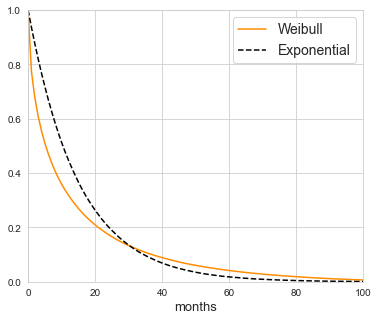

Weibull$\lambda$ = 0.10, $k$ = 0.600
Exponential $\lambda$ = 0.066


In [201]:
T = 12*10

plt.figure(figsize=(6,5))

# plt.title('Decreasing hazard rate (duration dependence)',fontsize=14)

h_data, dd_bins = np.histogram(sample_dd, bins=np.arange(0,T,1))
h_data= h_data/np.sum(h_data)

hc_data, hc_bins = np.histogram(sample_constant, bins=np.arange(0,T,1))
hc_data= hc_data/np.sum(hc_data)

# adj_exp = least_squares(ssr_cdf,0.04,args=(np.cumsum(h_data),1))

plt.plot(dd_bins, np.hstack((1,1-np.cumsum(h_data))), c='darkorange',
         label = r"Weibull") # $\lambda$ = {:,.2f}, $k$ = {:,.2f}".format(1/med_lbda,k)
plt.plot(hc_bins, np.hstack((1,1-np.cumsum(hc_data))), c='k',ls='--',
         label = r"Exponential") # $\lambda$ = {:,.2f}".format(1/implied_lambda))

plt.legend(fontsize=14)
plt.xlabel('months',fontsize=13)
plt.xlim(0,100)
plt.ylim(0,1)

plt.savefig('./plots/simulation1.eps',format='eps')
plt.show()

print(r"Weibull$\lambda$ = {:,.2f}, $k$ = {:,.3f}".format(1/med_lbda,k))
print(r"Exponential $\lambda$ = {:,.3f}".format(1/implied_lambda))

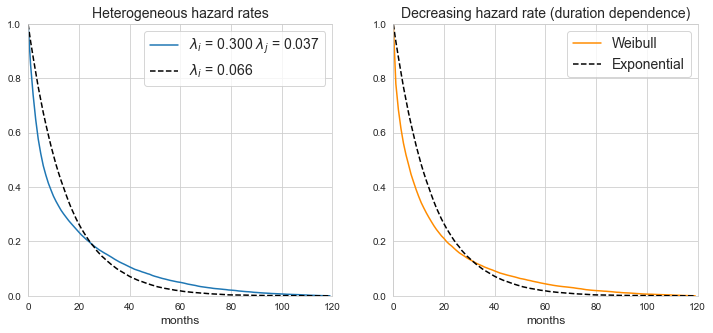

In [131]:
T = 12*10

plt.figure(figsize=(12,5))

# part 1: heterogeneity # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
plt.subplot(121)

plt.title('Heterogeneous hazard rates',fontsize=14)

ht_data, ht_bins = np.histogram(sample_ht, bins=np.arange(0,T,1))
ht_data= ht_data/np.sum(ht_data)

adj_exp = least_squares(ssr_cdf,0.04,args=(np.cumsum(h_data),1))

plt.plot(ht_bins, np.hstack((1,1-np.cumsum(ht_data))), 
         label = r"$\lambda_i$ = {:,.3f} $\lambda_j$ = {:,.3f}".format(1/fast_lbda,1/slow_lbda))
plt.plot(hc_bins, np.hstack((1,1-np.cumsum(hc_data))), c='k',ls='--',
         label = r"$\lambda_i$ = {:,.3f}".format(1/implied_lambda))
# plt.plot(np.hstack((1,1-expo_cdf(adj_exp.x[0],max_dur=T))),ls='--',c='k',alpha=1,
#          label = r"$\lambda$={:,.4f}".format(adj_exp.x[0]))

plt.legend(fontsize=14)
plt.xlabel('months',fontsize=12)
plt.xlim(0,T)
plt.ylim(0,1)

# part 2: duration dependence # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
plt.subplot(122)

plt.title('Decreasing hazard rate (duration dependence)',fontsize=14)

# h_data, bins = np.histogram(sample_dd, bins=np.arange(0,T,1))
# h_data= h_data/np.sum(h_data)

# adj_exp = least_squares(ssr_cdf,0.04,args=(np.cumsum(h_data),1))

plt.plot(dd_bins, np.hstack((1,1-np.cumsum(h_data))), c='darkorange',
         label = r"Weibull") # $\lambda$ = {:,.2f}, $k$ = {:,.2f}".format(1/med_lbda,k)
plt.plot(hc_bins, np.hstack((1,1-np.cumsum(hc_data))), c='k',ls='--',
         label = r"Exponential") # $\lambda$ = {:,.2f}".format(1/implied_lambda))

# plt.plot(bins, np.hstack((1,1-np.cumsum(h_data))), c='darkorange',
#          label = r"$\lambda$ = 0.05, $k$ = {:,.2f}".format(k))
# plt.plot(np.hstack((1,1-expo_cdf(adj_exp.x[0],max_dur=T))),ls='--',c='k',alpha=1,
#          label = r"$\lambda$={:,.4f}".format(adj_exp.x[0]))

plt.legend(fontsize=14)
plt.xlabel('months',fontsize=12)
plt.xlim(0,T)
plt.ylim(0,1)

# plt.savefig('./plots/sample_HTvDD.eps',format='eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


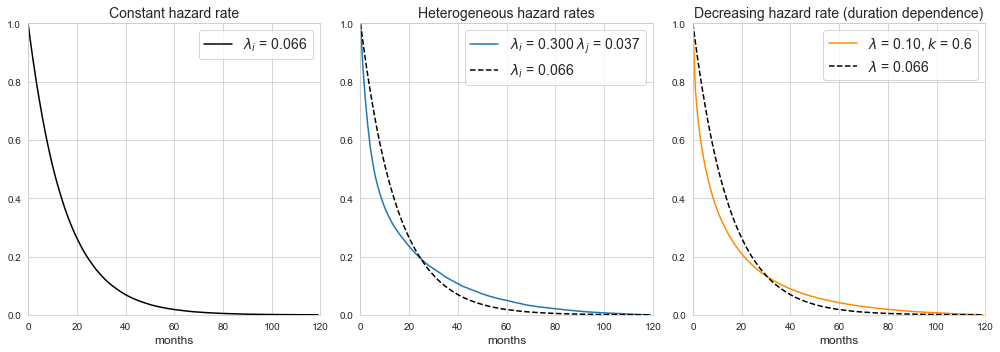

In [202]:
T = 12*10


plt.figure(figsize=(14,5))

plt.subplot(131)
plt.title('Constant hazard rate',fontsize=14)

plt.plot(hc_bins, np.hstack((1,1-np.cumsum(hc_data))), c='k',
         label = r"$\lambda_i$ = {:,.3f}".format(1/implied_lambda))

plt.legend(fontsize=14)
plt.xlabel('months',fontsize=12)
plt.xlim(0,T)
plt.ylim(0,1)

# part 1: heterogeneity # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
plt.subplot(132)

plt.title('Heterogeneous hazard rates',fontsize=14)

plt.plot(ht_bins, np.hstack((1,1-np.cumsum(ht_data))), 
         label = r"$\lambda_i$ = {:,.3f} $\lambda_j$ = {:,.3f}".format(1/fast_lbda,1/slow_lbda))
plt.plot(hc_bins, np.hstack((1,1-np.cumsum(hc_data))), c='k',ls='--',
         label = r"$\lambda_i$ = {:,.3f}".format(1/implied_lambda))

plt.legend(fontsize=14)
plt.xlabel('months',fontsize=12)
plt.xlim(0,T)
plt.ylim(0,1)

# part 2: duration dependence # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
plt.subplot(133)

plt.title('Decreasing hazard rate (duration dependence)',fontsize=14)

plt.plot(dd_bins, np.hstack((1,1-np.cumsum(h_data))), c='darkorange',
         label = r"$\lambda$ = {:,.2f}, $k$ = {:,.1f}".format(1/med_lbda,k)) #
plt.plot(hc_bins, np.hstack((1,1-np.cumsum(hc_data))), c='k',ls='--',
         label = r"$\lambda$ = {:,.3f}".format(1/implied_lambda)) #Exponential") # 

plt.legend(fontsize=14)
plt.xlabel('months',fontsize=12)
plt.xlim(0,T)
plt.ylim(0,1)

plt.tight_layout()
plt.savefig('./plots/sample_ConstantvHTvDD.eps',format='eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


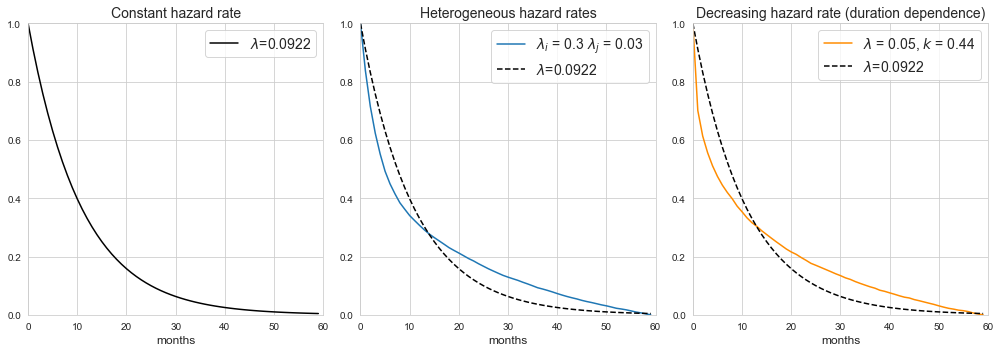

In [14]:
T = 12*5


plt.figure(figsize=(14,5))

plt.subplot(131)
plt.title('Constant hazard rate',fontsize=14)

h_data, bins = np.histogram(sample, bins=np.arange(0,T,1))
h_data= h_data/np.sum(h_data)
adj_exp = least_squares(ssr_cdf,0.04,args=(np.cumsum(h_data),1))

plt.plot(np.hstack((1,1-expo_cdf(adj_exp.x[0],max_dur=T))),c='k',alpha=1,
         label = r"$\lambda$={:,.4f}".format(adj_exp.x[0]))

plt.legend(fontsize=14)
plt.xlabel('months',fontsize=12)
plt.xlim(0,T)
plt.ylim(0,1)

# part 1: heterogeneity # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
plt.subplot(132)

plt.title('Heterogeneous hazard rates',fontsize=14)

plt.plot(bins, np.hstack((1,1-np.cumsum(h_data))), label = r"$\lambda_i$ = 0.3 $\lambda_j$ = 0.03")
plt.plot(np.hstack((1,1-expo_cdf(adj_exp.x[0],max_dur=T))),ls='--',c='k',alpha=1,
         label = r"$\lambda$={:,.4f}".format(adj_exp.x[0]))

plt.legend(fontsize=14)
plt.xlabel('months',fontsize=12)
plt.xlim(0,T)
plt.ylim(0,1)

# part 2: duration dependence # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
plt.subplot(133)

plt.title('Decreasing hazard rate (duration dependence)',fontsize=14)

h_data, bins = np.histogram(sample_dd, bins=np.arange(0,T,1))
h_data= h_data/np.sum(h_data)

adj_exp = least_squares(ssr_cdf,0.04,args=(np.cumsum(h_data),1))

plt.plot(bins, np.hstack((1,1-np.cumsum(h_data))), c='darkorange',
         label = r"$\lambda$ = 0.05, $k$ = {:,.2f}".format(k))
plt.plot(np.hstack((1,1-expo_cdf(adj_exp.x[0],max_dur=T))),ls='--',c='k',alpha=1,
         label = r"$\lambda$={:,.4f}".format(adj_exp.x[0]))

plt.legend(fontsize=14)
plt.xlabel('months',fontsize=12)
plt.xlim(0,T)
plt.ylim(0,1)

plt.tight_layout()
# plt.savefig('./plots/sample_ConstantvHTvDD.eps',format='eps')
plt.show()

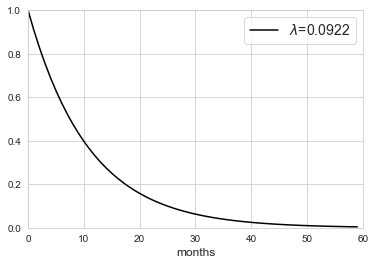

In [6]:
# only the exponential
plt.plot(np.hstack((1,1-expo_cdf(adj_exp.x[0],max_dur=T))),c='k',alpha=1,
         label = r"$\lambda$={:,.4f}".format(adj_exp.x[0]))

plt.legend(fontsize=14)
plt.xlabel('months',fontsize=12)
plt.xlim(0,T)
plt.ylim(0,1)
plt.show()

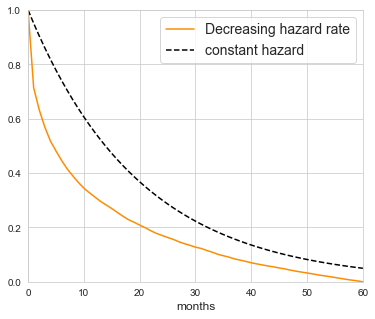

In [8]:
T = 12*5 + 1

plt.figure(figsize=(6,5))

# plt.title('Decreasing hazard rate (duration dependence)',fontsize=14)

h_data, bins = np.histogram(sample_dd, bins=np.arange(0,T,1))
h_data= h_data/np.sum(h_data)

plt.plot(bins, np.hstack((1,1-np.cumsum(h_data))), c='darkorange',
         label = 'Decreasing hazard rate')
#          label = r"$\lambda$ = 0.05, $k$ = {:,.2f}".format(k))
plt.plot(np.hstack((1,1-expo_cdf(0.05,max_dur=T))),ls='--',c='k',alpha=1,
         label = 'constant hazard')
#          label = r"$\lambda$={:,.4f}".format(0.05)

plt.legend(fontsize=14)
plt.xlabel('months',fontsize=12)
plt.xlim(0,T-1)
plt.ylim(0,1)

plt.savefig('./plots/DecreasingHazardPlot.pdf',format='pdf')
plt.show()

## Mock decomposition

Drawing samples

In [153]:
fast_lbda = 1 / 0.3
med_lbda = 1 / 0.1
slow_lbda = 1/0.0374226
k = 0.6
N = 100000

sample_fast = expon.rvs(scale=fast_lbda, size=(N//2,2))
sample_slow = expon.rvs(scale=slow_lbda, size=(N//2,2))
np.average(np.vstack((sample_fast,sample_slow)))

sample_ht = np.vstack((sample_fast,sample_slow))
sample_dd = weibull.rvs(c=k,scale=med_lbda, size=(N,2))

implied_lambda = np.average(sample_dd)
sample_constant = expon.rvs(scale=implied_lambda, size=(N,2))
np.average(sample_constant)


15.037275221163801

In [154]:
data_ht = pd.DataFrame(sample_ht, columns=['n1','n2'])
data_dd = pd.DataFrame(sample_dd, columns=['n1','n2'])
data_hc = pd.DataFrame(sample_constant, columns=['n1','n2'])

data_ht.head()

,n1,n2
0,3.614817453424164,1.3768665112354574
1,0.9983003566431192,0.7600870262976045
2,7.421591002199336,5.360634463122204
3,0.6991808579080417,6.731646940207285
4,3.806141873889329,4.859645046235117


In [157]:
data_hc['mu_i'] = (data_hc.n1 + data_hc.n2)/2
data_hc['mu_y'] = np.sum((data_hc.n1 + data_hc.n2))/(2*N)

data_hc['sig_i'] = (data_hc.n1 - data_hc.n2)**2/2
data_hc['sig_y'] = np.sum((data_hc.n1**2 + data_hc.n2**2 - 2*data_hc.mu_y**2))/(2*N-1)

data_hc['sig_w'] = np.sum(data_hc.sig_i)/N
data_hc['sig_b'] = np.sum(data_hc.mu_i**2 - 0.5*data_hc.sig_i)/N - data_hc.mu_y**2 + (1/(2*N))*data_hc.sig_y

data_hc['sig_c'] = np.sum(data_hc.mu_i**2 - 0.5*data_hc.sig_i)/N
data_hc['sig_e'] = np.sum(1.5*data_hc.sig_i - data_hc.mu_i**2)/N

data_ht['mu_i'] = (data_ht.n1 + data_ht.n2)/2
data_ht['mu_y'] = np.sum((data_ht.n1 + data_ht.n2))/(2*N)

data_ht['sig_i'] = (data_ht.n1 - data_ht.n2)**2/2
data_ht['sig_y'] = np.sum((data_ht.n1**2 + data_ht.n2**2 - 2*data_ht.mu_y**2))/(2*N-1)

data_ht['sig_w'] = np.sum(data_ht.sig_i)/N
data_ht['sig_b'] = np.sum(data_ht.mu_i**2 - 0.5*data_ht.sig_i)/N - data_ht.mu_y**2 + (1/(2*N))*data_ht.sig_y

data_ht['sig_c'] = np.sum(data_ht.mu_i**2 - 0.5*data_ht.sig_i)/N
data_ht['sig_e'] = np.sum(1.5*data_ht.sig_i - data_ht.mu_i**2)/N

data_dd['mu_i'] = (data_dd.n1 + data_dd.n2)/2
data_dd['mu_y'] = np.sum((data_dd.n1 + data_dd.n2))/(2*N)

data_dd['sig_i'] = (data_dd.n1 - data_dd.n2)**2/2
data_dd['sig_y'] = np.sum((data_dd.n1**2 + data_dd.n2**2 - 2*data_dd.mu_y**2))/(2*N-1)

data_dd['sig_w'] = np.sum(data_dd.sig_i)/N
data_dd['sig_b'] = np.sum(data_dd.mu_i**2 - 0.5*data_dd.sig_i)/N - data_dd.mu_y**2 + (1/(2*N))*data_dd.sig_y

data_dd['sig_c'] = np.sum(data_dd.mu_i**2 - 0.5*data_dd.sig_i)/N
data_dd['sig_e'] = np.sum(1.5*data_dd.sig_i - data_dd.mu_i**2)/N

In [161]:
print('Constant sample -- n={:,.0f} \n'.format(N))
print('Total variance: {:,.2f}'.format(data_hc.sig_y.iloc[0]))
print('Between variance: {:,.2f}'.format(data_hc.sig_b.iloc[0]))
print('Constant variance: {:,.2f}'.format(data_hc.sig_c.iloc[0]))
print('Excess variance: {:,.2f} \n'.format(data_hc.sig_e.iloc[0]))

print('Share constant:  {:,.4f}'.format(data_hc.sig_c.iloc[0]/data_hc.sig_y.iloc[0]))
print('Share duration dependence:  {:,.4f}'.format(data_hc.sig_e.iloc[0]/data_hc.sig_y.iloc[0]))
print('Share heterogeneity:  {:,.4f} \n'.format(data_hc.sig_b.iloc[0]/data_hc.sig_y.iloc[0]))

print('2 Exponentials sample -- n={:,.0f} \n'.format(N))
print('Total variance: {:,.2f}'.format(data_ht.sig_y.iloc[0]))
print('Between variance: {:,.2f}'.format(data_ht.sig_b.iloc[0]))
print('Constant variance: {:,.2f}'.format(data_ht.sig_c.iloc[0]))
print('Excess variance: {:,.2f} \n'.format(data_ht.sig_e.iloc[0]))

print('Share constant:  {:,.4f}'.format(data_ht.sig_c.iloc[0]/data_ht.sig_y.iloc[0]))
print('Share duration dependence:  {:,.4f}'.format(data_ht.sig_e.iloc[0]/data_ht.sig_y.iloc[0]))
print('Share heterogeneity:  {:,.4f} \n'.format(data_ht.sig_b.iloc[0]/data_ht.sig_y.iloc[0]))

print('Weibull sample -- n={:,.0f} \n'.format(N))
print('Total variance: {:,.2f}'.format(data_dd.sig_y.iloc[0]))
print('Between variance: {:,.2f}'.format(data_dd.sig_b.iloc[0]))
print('Constant variance: {:,.2f}'.format(data_dd.sig_c.iloc[0]))
print('Excess variance: {:,.2f} \n'.format(data_dd.sig_e.iloc[0]))

print('Share constant:  {:,.4f}'.format(data_dd.sig_c.iloc[0]/data_dd.sig_y.iloc[0]))
print('Share duration dependence:  {:,.4f}'.format(data_dd.sig_e.iloc[0]/data_dd.sig_y.iloc[0]))
print('Share heterogeneity:  {:,.4f}'.format(data_dd.sig_b.iloc[0]/data_dd.sig_y.iloc[0]))

Constant sample -- n=100,000 

Total variance: 226.06
Between variance: -0.29
Constant variance: 225.83
Excess variance: 0.52 

Share constant:  0.9990
Share duration dependence:  0.0023
Share heterogeneity:  -0.0013 

2 Exponentials sample -- n=100,000 

Total variance: 496.08
Between variance: 137.08
Constant variance: 363.13
Excess variance: -4.13 

Share constant:  0.7320
Share duration dependence:  -0.0083
Share heterogeneity:  0.2763 

Weibull sample -- n=100,000 

Total variance: 707.69
Between variance: 0.63
Constant variance: 226.76
Excess variance: 480.30 

Share constant:  0.3204
Share duration dependence:  0.6787
Share heterogeneity:  0.0009


In [197]:
#                          index=((,)),columns=('Exponential','Exponential mix','Weibull'))
sim_table = pd.DataFrame(np.vstack((data_hc['mu_y'].iloc[0],data_ht['mu_y'].iloc[0],data_dd['mu_y'].iloc[0])),
                         columns=(r'$\mu_y$',))
sim_table[r'$\sigma_y$'] = np.vstack((data_hc['sig_y'].iloc[0],data_ht['sig_y'].iloc[0],data_dd['sig_y'].iloc[0]))

sim_table[r'$\sigma_c$'] = np.vstack((data_hc['sig_c'].iloc[0],data_ht['sig_c'].iloc[0],data_dd['sig_c'].iloc[0]))
sim_table[r'$\sigma_c$ share'] = sim_table[r'$\sigma_c$']/sim_table[r'$\sigma_y$'] 

sim_table[r'$\sigma_b$'] = np.vstack((data_hc['sig_b'].iloc[0],data_ht['sig_b'].iloc[0],data_dd['sig_b'].iloc[0]))
sim_table[r'$\sigma_b$ share'] = sim_table[r'$\sigma_b$']/sim_table[r'$\sigma_y$'] 
s
im_table[r'$\sigma_e$'] = np.vstack((data_hc['sig_e'].iloc[0],data_ht['sig_e'].iloc[0],data_dd['sig_e'].iloc[0]))
sim_table[r'$\sigma_e$ share'] = sim_table[r'$\sigma_e$']/sim_table[r'$\sigma_y$'] 
sim_table = np.round(sim_table.T,3)
sim_table = sim_table.rename(columns={0:'Exponential',1:'Exponential Mix', 2: 'Weibull'})

print(sim_table.to_latex(escape=False))

\begin{tabular}{lrrr}
\toprule
{} &  Exponential &  Exponential Mix &  Weibull \\
\midrule
$\mu_y$          &       15.037 &           15.035 &   15.038 \\
$\sigma_y$       &      226.057 &          496.085 &  707.687 \\
$\sigma_c$       &      225.828 &          363.132 &  226.759 \\
$\sigma_c$ share &        0.999 &            0.732 &     0.32 \\
$\sigma_b$       &       -0.291 &          137.083 &    0.629 \\
$\sigma_b$ share &       -0.001 &            0.276 &    0.001 \\
$\sigma_e$       &         0.52 &            -4.13 &  480.298 \\
$\sigma_e$ share &        0.002 &           -0.008 &    0.679 \\
\bottomrule
\end{tabular}



### Repeated experiments

In [6]:
fast_lbda = 1 / 0.3
med_lbda = 1 / 0.05
slow_lbda = 1 / 0.03
k = 0.44

N = 100000
reps = 100

share_e = np.zeros((reps,2))
share_b = np.zeros((reps,2))
share_c  = np.zeros((reps,2))
    
var_y = np.zeros((reps,2))
var_c = np.zeros((reps,2))
var_b = np.zeros((reps,2))
var_e = np.zeros((reps,2))

np.random.seed(2102006)

for ri in range(reps):
    
        sample_fast = expon.rvs(scale=fast_lbda, size=(N//2,2))
        sample_slow = expon.rvs(scale=slow_lbda, size=(N//2,2))

        sample_ht = np.vstack((sample_fast,sample_slow))
        sample_dd = weibull.rvs(c=k,scale=med_lbda, size=(N,2))

        data_ht = pd.DataFrame(sample_ht, columns=['n1','n2'])
        data_dd = pd.DataFrame(sample_dd, columns=['n1','n2'])


        for di, data in enumerate((data_ht,data_dd)):

            data['mu_i'] = (data.n1 + data.n2)/2
            data['mu_y'] = np.sum((data.n1 + data.n2))/(2*N)

            data['sig_i'] = (data.n1 - data.n2)**2/2
            data['sig_y'] = np.sum((data.n1**2 + data.n2**2 - 2*data.mu_y**2))/(2*N-1)

            data['sig_w'] = np.sum(data.sig_i)/N
            data['sig_b'] = np.sum(data.mu_i**2 - 0.5*data.sig_i)/N - data.mu_y**2 + (1/(2*N))*data.sig_y

            data['sig_c'] = np.sum(data.mu_i**2 - 0.5*data.sig_i)/N
            data['sig_e'] = np.sum(1.5*data.sig_i - data.mu_i**2)/N

            share_e[ri,di]  = abs(data.sig_e.iloc[0]/data.sig_y.iloc[0])
            share_b[ri,di]  = abs(data.sig_b.iloc[0]/data.sig_y.iloc[0])
            share_c[ri,di]  = abs(data.sig_c.iloc[0]/data.sig_y.iloc[0])

            var_y[ri,di]  = abs(data.sig_y.iloc[0])
            var_c[ri,di]  = abs(data.sig_c.iloc[0])
            var_b[ri,di]  = abs(data.sig_b.iloc[0])
            var_e[ri,di]  = abs(data.sig_e.iloc[0])

std_e = np.std(share_e, axis=0)
std_b = np.std(share_b, axis=0)
std_c = np.std(share_c, axis=0)

std_vy = np.std(var_y, axis=0)
std_vc = np.std(var_c, axis=0)
std_vb = np.std(var_b, axis=0)
std_ve = np.std(var_e, axis=0)

mean_e = np.mean(share_e, axis=0)
mean_b = np.mean(share_b, axis=0)
mean_c = np.mean(share_c, axis=0)

mean_vy = np.mean(var_y, axis=0)
mean_vc = np.mean(var_c, axis=0)
mean_vb = np.mean(var_b, axis=0)
mean_ve = np.mean(var_e, axis=0)

In [7]:
print('2 Exponentials sample -- n={:,.0f}, repetitions={:,.0f} \n'.format(N, reps))
print('Total variance: {:,.2f} \n ({:,.2f})'.format(mean_vy[0],std_vy[0]))
print('Between variance: {:,.2f} \n ({:,.2f})'.format(mean_vb[0],std_vb[0]))
print('Constant variance: {:,.2f} \n ({:,.2f})'.format(mean_vc[0],std_vc[0]))
print('Excess variance: {:,.2f}  \n ({:,.2f}) \n'.format(mean_ve[0],std_ve[0]))

print('Share heterogeneity:  {:,.3f}'.format(mean_b[0]))
print('Share constant:  {:,.3f}'.format(mean_c[0]))
print('Share duration dependence:  {:,.3f}  \n'.format(mean_e[0]))
      
print('Weibull sample -- n={:,.0f}, repetitions={:,.0f} \n'.format(N, reps))
print('Total variance: {:,.2f} \n ({:,.2f})'.format(mean_vy[1],std_vy[1]))
print('Between variance: {:,.2f}  \n ({:,.2f})'.format(mean_vb[1],std_vb[1]))
print('Constant variance: {:,.2f}  \n ({:,.2f})'.format(mean_vc[1],std_vc[1]))
print('Excess variance: {:,.2f} \n ({:,.2f}) \n'.format(mean_ve[1],std_ve[1]))

print('Share heterogeneity:  {:,.3f}'.format(mean_b[1]))
print('Share constant:  {:,.3f}'.format(mean_c[1]))
print('Share duration dependence:  {:,.3f} '.format(mean_e[1]))

2 Exponentials sample -- n=100,000, repetitions=100 

Total variance: 786.23 
 (6.55)
Between variance: 224.86 
 (3.31)
Constant variance: 561.04 
 (4.74)
Excess variance: 5.12  
 (3.75) 

Share heterogeneity:  0.286
Share constant:  0.714
Share duration dependence:  0.007  

Weibull sample -- n=100,000, repetitions=100 

Total variance: 19,918.20 
 (537.02)
Between variance: 48.55  
 (39.49)
Constant variance: 2,721.99  
 (66.80)
Excess variance: 17,201.33 
 (540.16) 

Share heterogeneity:  0.002
Share constant:  0.137
Share duration dependence:  0.864 


### Sample size variation plot

In [4]:
fast_lbda = 1 / 0.3
med_lbda = 1 / 0.05
slow_lbda = 1 / 0.03
k = 0.44

reps = 100

share_e = np.zeros((13,reps,2))
share_b = np.zeros((13,reps,2))

for ni, N in enumerate((100,200, 500, 1000, 2000, 5000, 10000,20000,50000,100000,200000,500000,1000000)):
    
    for ri in range(reps):

        sample_fast = expon.rvs(scale=fast_lbda, size=(N//2,2))
        sample_slow = expon.rvs(scale=slow_lbda, size=(N//2,2))

        sample_ht = np.vstack((sample_fast,sample_slow))
        sample_dd = weibull.rvs(c=k,scale=med_lbda, size=(N,2))

        data_ht = pd.DataFrame(sample_ht, columns=['n1','n2'])
        data_dd = pd.DataFrame(sample_dd, columns=['n1','n2'])


        for di, data in enumerate((data_ht,data_dd)):

            data['mu_i'] = (data.n1 + data.n2)/2
            data['mu_y'] = np.sum((data.n1 + data.n2))/(2*N)

            data['sig_i'] = (data.n1 - data.n2)**2/2
            data['sig_y'] = np.sum((data.n1**2 + data.n2**2 - 2*data.mu_y**2))/(2*N-1)

            data['sig_w'] = np.sum(data.sig_i)/N
            data['sig_b'] = np.sum(data.mu_i**2 - 0.5*data.sig_i)/N - data.mu_y**2 + (1/(2*N))*data.sig_y

            data['sig_c'] = np.sum(data.mu_i**2 - 0.5*data.sig_i)/N
            data['sig_e'] = np.sum(1.5*data.sig_i - data.mu_i**2)/N

            share_e[ni,ri,di]  = abs(data.sig_e.iloc[0]/data.sig_y.iloc[0])
            share_b[ni,ri,di]  = abs(data.sig_b.iloc[0]/data.sig_y.iloc[0])


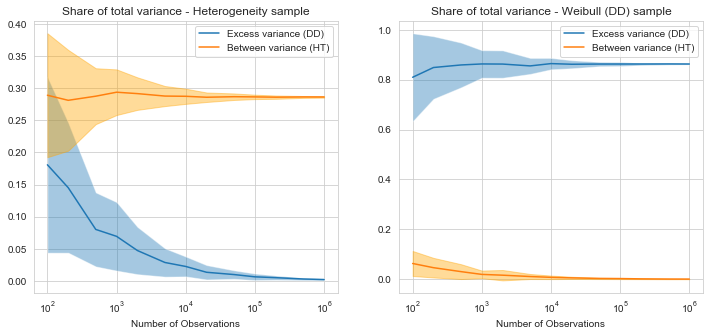

In [5]:
std_e_ht = np.std(share_e[:,:,0], axis=1)
std_e_dd = np.std(share_e[:,:,1], axis=1)
std_b_ht = np.std(share_b[:,:,0], axis=1)
std_b_dd = np.std(share_b[:,:,1], axis=1)

mean_e_ht = np.average(share_e[:,:,0], axis=1)
mean_e_dd = np.average(share_e[:,:,1], axis=1)
mean_b_ht = np.average(share_b[:,:,0], axis=1)
mean_b_dd = np.average(share_b[:,:,1], axis=1)

x_range = np.array((100,200, 500, 1000, 2000, 5000, 10000,20000,50000,100000,200000,500000,1000000))

plt.figure(figsize=(12,5))
plt.subplot(121)
plt.title('Share of total variance - Heterogeneity sample')
plt.plot(x_range,mean_e_ht,label='Excess variance (DD)')
plt.fill_between(x_range,mean_e_ht+std_e_ht, y2=mean_e_ht-std_e_ht, alpha=0.4)
plt.plot(x_range,np.average(share_b[:,:,0], axis=1),label='Between variance (HT)')
plt.fill_between(x_range,mean_b_ht+std_b_ht, y2=mean_b_ht-std_b_ht, alpha=0.4, color='orange')
# plt.xticks(range(6),(100,1000,10000,100000,1000000,10000000))
plt.legend()
plt.xscale('log')
plt.xlabel('Number of Observations')

plt.subplot(122)
plt.title('Share of total variance - Weibull (DD) sample')
plt.plot(x_range,mean_e_dd,label='Excess variance (DD)')
plt.fill_between(x_range,mean_e_dd+std_e_dd, y2=mean_e_dd-std_e_dd, alpha=0.4)
plt.plot(x_range,mean_b_dd,label='Between variance (HT)')
plt.fill_between(x_range,mean_b_dd+std_b_dd, y2=mean_b_dd-std_b_dd, alpha=0.4, color='orange')
# plt.xticks(range(6),(100,1000,10000,100000,1000000,10000000))
plt.legend()
plt.xscale('log')
plt.xlabel('Number of Observations')

plt.savefig('./plots/simulation_HTvDD.png',format='png')
plt.show()

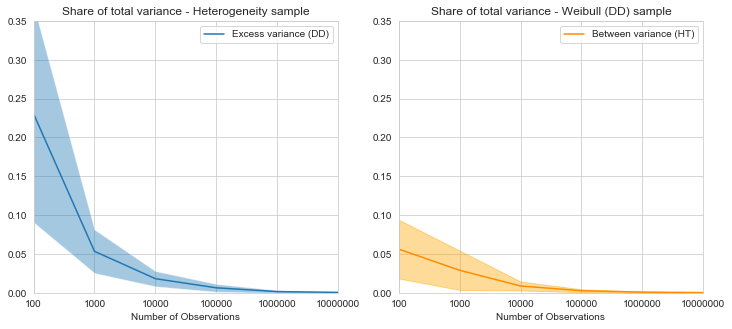

In [13]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.title('Share of total variance - Heterogeneity sample')
plt.plot(mean_e_ht,label='Excess variance (DD)')
plt.fill_between(range(6),mean_e_ht+std_e_ht, y2=mean_e_ht-std_e_ht, alpha=0.4)
plt.xticks(range(6),(100,1000,10000,100000,1000000,10000000))
plt.ylim(0,0.35)
plt.xlim(0,5)
plt.legend()
plt.xlabel('Number of Observations')

plt.subplot(122)
plt.title('Share of total variance - Weibull (DD) sample')
plt.plot(mean_b_dd,label='Between variance (HT)', color='darkorange')
plt.fill_between(range(6),mean_b_dd+std_b_dd, y2=mean_b_dd-std_b_dd, alpha=0.4, color='orange')
plt.xticks(range(6),(100,1000,10000,100000,1000000,10000000))
plt.ylim(0,0.35)
plt.xlim(0,5)
plt.legend()
plt.xlabel('Number of Observations')

plt.savefig('./plots/simulation_HTvDD_error1.png',format='png')
plt.show()

### Duration dependence variation plot

In [14]:
# fast_lbda = 1 / 0.3
med_lbda = 1 / 0.05
# slow_lbda = 1 / 0.03

N = 100000
nx = 100
reps = 20

share_e = np.zeros((nx,reps))
share_b = np.zeros((nx,reps))

for ni, k in enumerate(np.linspace(0.1,0.99,nx)):
    
    for ri in range(reps):

        sample_dd = weibull.rvs(c=k,scale=med_lbda, size=(N,2))
        data = pd.DataFrame(sample_dd, columns=['n1','n2'])

        data['mu_i'] = (data.n1 + data.n2)/2
        data['mu_y'] = np.sum((data.n1 + data.n2))/(2*N)

        data['sig_i'] = (data.n1 - data.n2)**2/2
        data['sig_y'] = np.sum((data.n1**2 + data.n2**2 - 2*data.mu_y**2))/(2*N-1)

        data['sig_w'] = np.sum(data.sig_i)/N
        data['sig_b'] = np.sum(data.mu_i**2 - 0.5*data.sig_i)/N - data.mu_y**2 + (1/(2*N))*data.sig_y

        data['sig_c'] = np.sum(data.mu_i**2 - 0.5*data.sig_i)/N
        data['sig_e'] = np.sum(1.5*data.sig_i - data.mu_i**2)/N

        share_e[ni,ri]  = abs(data.sig_e.iloc[0]/data.sig_y.iloc[0])
        share_b[ni,ri]  = abs(data.sig_c.iloc[0]/data.sig_y.iloc[0])


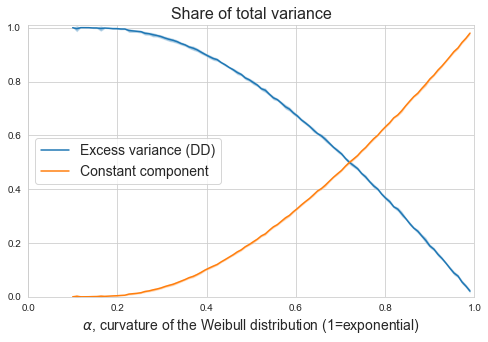

In [15]:
std_e_mix = np.std(share_e[:,:], axis=1)
std_b_mix = np.std(share_b[:,:], axis=1)

mean_e_mix = np.average(share_e[:,:], axis=1)
mean_b_mix = np.average(share_b[:,:], axis=1)

plt.figure(figsize=(8,5))
# plt.subplot(121)
plt.title('Share of total variance',fontsize=16)
plt.plot(np.linspace(0.1,0.99,nx),mean_e_mix,label='Excess variance (DD)')
plt.fill_between(np.linspace(0.1,0.99,nx),mean_e_mix+std_e_mix, y2=mean_e_mix-std_e_mix, alpha=0.4)
plt.plot(np.linspace(0.1,0.99,nx),mean_b_mix,label='Constant component')
plt.fill_between(np.linspace(0.1,0.99,nx),mean_b_mix+std_b_mix, y2=mean_b_mix-std_b_mix, alpha=0.4)
# plt.xticks(range(nx),np.linspace(0.1,0.99,nx))
plt.xlabel(r'$\alpha$, curvature of the Weibull distribution (1=exponential)',fontsize=14)
plt.legend(fontsize=14)
plt.xlim(0,1)
plt.ylim(0,1.01)

# plt.subplot(122)
# plt.title('Share of total variance - Constant')


# # plt.xticks(range(nx),(0.1,0.33,0.5,0.7,0.9,0.99))
# plt.ylim(0,1.01)
# plt.xlim(0,1)
# plt.xlabel(r'$\alpha$')

plt.savefig('./plots/simulation_ConstnatvsDD.pdf',format='pdf')
plt.show()

### Sample size variation plot - with both DD and HT

In [26]:
fast_lbda = 1 / 0.3
slow_lbda = 1 / 0.03
k1 = 0.8
k2 = 0.9

reps = 20

share_e_mix = np.zeros((13,reps))
share_b_mix = np.zeros((13,reps))

for ni, N in enumerate((100,200, 500, 1000, 2000, 5000, 10000,20000,50000,100000,200000,500000,1000000)):
    
    for ri in range(reps):

        sample_fast = weibull.rvs(c=k1,scale=fast_lbda, size=(N//2,2))
        sample_slow = weibull.rvs(c=k2,scale=slow_lbda, size=(N//2,2))

        sample_mix = np.vstack((sample_fast,sample_slow))

        data = pd.DataFrame(sample_mix, columns=['n1','n2'])
        
        data['mu_i'] = (data.n1 + data.n2)/2
        data['mu_y'] = np.sum((data.n1 + data.n2))/(2*N)

        data['sig_i'] = (data.n1 - data.n2)**2/2
        data['sig_y'] = np.sum((data.n1**2 + data.n2**2 - 2*data.mu_y**2))/(2*N-1)

        data['sig_w'] = np.sum(data.sig_i)/N
        data['sig_b'] = np.sum(data.mu_i**2 - 0.5*data.sig_i)/N - data.mu_y**2 + (1/(2*N))*data.sig_y

        data['sig_c'] = np.sum(data.mu_i**2 - 0.5*data.sig_i)/N
        data['sig_e'] = np.sum(1.5*data.sig_i - data.mu_i**2)/N

        share_e_mix[ni,ri]  = abs(data.sig_e.iloc[0]/data.sig_y.iloc[0])
        share_b_mix[ni,ri]  = abs(data.sig_b.iloc[0]/data.sig_y.iloc[0])


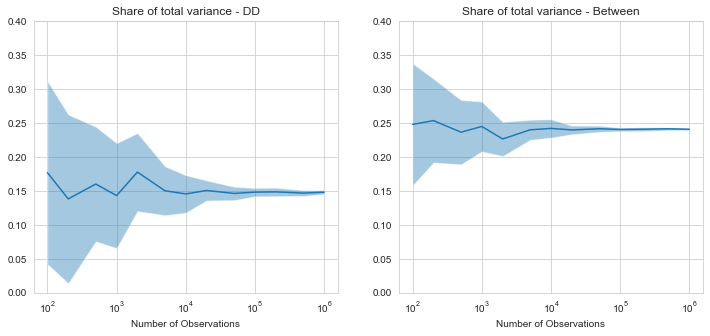

In [27]:
std_e_mix = np.std(share_e_mix[:,:], axis=1)
std_b_mix = np.std(share_b_mix[:,:], axis=1)

mean_e_mix = np.average(share_e_mix[:,:], axis=1)
mean_b_mix = np.average(share_b_mix[:,:], axis=1)

x_range = np.array((100,200, 500, 1000, 2000, 5000, 10000,20000,50000,100000,200000,500000,1000000))

plt.figure(figsize=(12,5))
plt.subplot(121)
plt.title('Share of total variance - DD')
plt.plot(x_range,mean_e_mix,label='Excess variance (DD)')
plt.fill_between(x_range,mean_e_mix+std_e_mix, y2=mean_e_mix-std_e_mix, alpha=0.4)
# plt.xticks(range(6),(100,1000,10000,100000,1000000,10000000))
plt.xlabel('Number of Observations')
plt.ylim(0,0.4)
plt.xscale('log')

plt.subplot(122)
plt.title('Share of total variance - Between')
plt.plot(x_range,mean_b_mix,label='Between variance (HT)')
plt.fill_between(x_range,mean_b_mix+std_b_mix, y2=mean_b_mix-std_b_mix, alpha=0.4)
# plt.xticks(range(6),(100,1000,10000,100000,1000000,10000000))
plt.xlabel('Number of Observations')
plt.ylim(0,0.4)
plt.xscale('log')

plt.savefig('./plots/simulation_LargeN.png',format='png')
plt.show()